In [13]:
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sourcing data from https://pdas.samhsa.gov/
psychDrugUse = pd.read_csv('Graphics/AURXYR x YEAR.csv', index_col=['YEAR IN WHICH DATA WAS COLLECTED'])  
MI = pd.read_csv('Graphics/MI_CAT_U x YEAR.csv', index_col=['YEAR IN WHICH DATA WAS COLLECTED'])

In [3]:
MIPV = MI.pivot_table(values='Weighted Count', 
                      index='YEAR IN WHICH DATA WAS COLLECTED',
                      columns='RC-CATEGORICAL MI INDICATOR REVISED')

In [4]:
psychDrugPV = psychDrugUse.pivot_table(values='Weighted Count', 
                                       index='YEAR IN WHICH DATA WAS COLLECTED',
                                       columns='TOOK ANY PRESCRIP MED FOR MH COND PAST 12 MOS')
psychDrugPV = psychDrugPV.drop(columns=['3 - Yes Logically assigned',
                                        '85 - BAD DATA Logically assigned',
                                        '89 - LEGITIMATE SKIP Logically assigned',
                                        '94 - DON T KNOW',
                                        '97 - REFUSED',
                                        '98 - BLANK',
                                        '99 - LEGITIMATE SKIP'])
psychDrugPV['Total YN Response'] = psychDrugPV['1 - Yes'] + psychDrugPV['2 - No']

In [5]:
# MI PV starts at 2008, so drop previous indexes from psychDrugPV and MIPV
psychDrugPV = psychDrugPV.drop(index=['2002','2003','2004','2005','2006','2007', 'Overall'])
MIPV = MIPV.drop(index=['2002','2003','2004','2005','2006','2007', 'Overall'])

In [6]:
MIPV['Some mental illness'] = MIPV['1 - Past Year Mild Mental Illness'] + MIPV['2 - Past Year Moderate Mental Illness'] + MIPV['3 - Past Year Serious Mental Illness']
MIPV['All respondents'] = MIPV['Some mental illness'] + MIPV['0 - No Past Year MI']

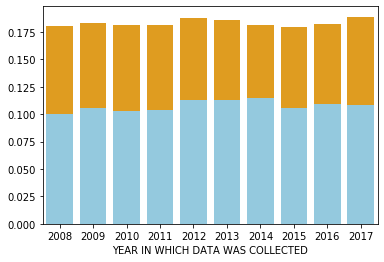

In [7]:
ax = sns.barplot(x=MIPV.index, y=MIPV['Some mental illness']/MIPV['All respondents'], color='orange')
sns.barplot(x=psychDrugPV.index, y=psychDrugPV['1 - Yes']/psychDrugPV['Overall'], ax=ax, color='skyblue')

In [8]:
sns.barplot?

In [9]:
MIPV.columns

Index(['0 - No Past Year MI', '1 - Past Year Mild Mental Illness',
       '2 - Past Year Moderate Mental Illness',
       '3 - Past Year Serious Mental Illness', 'Overall',
       'Some mental illness', 'All respondents'],
      dtype='object', name='RC-CATEGORICAL MI INDICATOR REVISED')

([8.8, 3.8500000000000005, 0.5249999999999999, 27.36], 40.535000000000004)

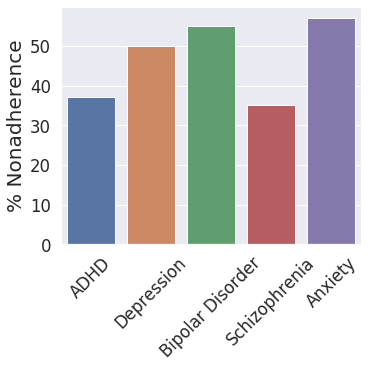

In [28]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5778728/

#Patients with depressive symptoms had not taken almost half of the
# prescribed doses within 3 months of initiation of the therapy. 
#The rates of adherence are low at 50–60% and 35% for schizophrenia
# and bipolar affective disorders, respectively [3]. Furthermore, 
# patients with major psychiatric disorders with medication 
# non-adherence can cause exacerbation of their illness and 
# complications which lead to re-hospitalization, poor 
# psychosocial outcomes, relapse of symptoms, reduce effectiveness 
# of subsequent treatment, wastage of limited health care resources
#, increase substance abuse, poor quality of life, and increased 
# suicide [3, 10, 11, 15–18].

# Rates of nonadherence also
#

sns.set(font_scale=1.5)

fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = sns.barplot(x = ['ADHD', 'Depression', 'Bipolar Disorder', 'Schizophrenia', 'Anxiety'],
                y = [37, 50,55,35, 57])
ax.set_ylabel('% Nonadherence', fontsize=20)
plt.xticks(rotation=45)
plt.savefig('Graphics/nonadherence.png')


# https://www.nami.org/Learn-More/Mental-Health-By-the-Numbers
ADHD = 11 # Million people
Anxiety = 48 # Million people
MajorDepression = 17.6 # Million people
Bipolar = 7 # Million people
Schizophrenia = 1.5 # Million people

num_NA = [0.5*MajorDepression, 0.55*Bipolar, 0.35*Schizophrenia, 0.57*Anxiety]
num_NA, sum(num_NA)